In [1]:
import pandas as pd
import datetime
import requests

In [2]:
import os
import sys

p = os.path.abspath('..')
if p not in sys.path:
    sys.path.append(p)

from extract import unix_time_millis, extract_multi_periods

In [3]:
dt = datetime.datetime.now()

In [4]:
dt

datetime.datetime(2020, 8, 25, 22, 58, 17, 323940)

In [5]:
dt_diff = dt - datetime.timedelta(days=0)
dt_diff2 = dt - datetime.timedelta(days=30)

In [6]:
startDate = unix_time_millis(dt_diff)
endDate = unix_time_millis(dt_diff2)

In [7]:
startDate

1598396297323

In [8]:
endDate

1595804297323

In [9]:
stock = 'AA'
endpoint = r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format(stock)
    
client_id = 'PU7ZSWNYV6GHUPP5UARLAONCEFVN3JHU'

periodType='day'
frequencyType='minute'
frequency='1'
periods=None
startDate=None
endDate=None
extended='true'
    

payload = {'apikey':client_id,
          'periodType':periodType,
          'frequencyType':frequencyType,
          'frequency': frequency,
          'period':periods,
          'needExtendedHoursData':extended,
          'startDate':endDate,
          'endDate':startDate
          }

content = requests.get(url= endpoint, params = payload)
data = content.json()

In [10]:
data

{'candles': [{'open': 16.05,
   'high': 16.05,
   'low': 15.95,
   'close': 15.95,
   'volume': 891,
   'datetime': 1597143600000},
  {'open': 16.0,
   'high': 16.0,
   'low': 16.0,
   'close': 16.0,
   'volume': 592,
   'datetime': 1597144080000},
  {'open': 16.05,
   'high': 16.05,
   'low': 15.96,
   'close': 15.96,
   'volume': 2450,
   'datetime': 1597144140000},
  {'open': 15.96,
   'high': 15.96,
   'low': 15.96,
   'close': 15.96,
   'volume': 435,
   'datetime': 1597144200000},
  {'open': 15.94,
   'high': 15.94,
   'low': 15.94,
   'close': 15.94,
   'volume': 600,
   'datetime': 1597144380000},
  {'open': 15.94,
   'high': 15.94,
   'low': 15.94,
   'close': 15.94,
   'volume': 990,
   'datetime': 1597145460000},
  {'open': 15.94,
   'high': 15.94,
   'low': 15.94,
   'close': 15.94,
   'volume': 326,
   'datetime': 1597145520000},
  {'open': 16.01,
   'high': 16.01,
   'low': 16.01,
   'close': 16.01,
   'volume': 401,
   'datetime': 1597146060000},
  {'open': 16.04,
   'hi

In [11]:
from extract import extract_stock

def extract_multi_periods(stock,
                          periodType='day', 
                          frequencyType='minute', 
                          frequency='1', 
                          periods=10,
                          return_df=True, 
                          extended='true',
                          num_extracts=3,
                          endDate=None,
                          startDate=None):
    
    dt_end = datetime.datetime.now()
    endDate = unix_time_millis(dt_end)
    
    dt_start = dt_end - datetime.timedelta(days=periods)
    startDate = unix_time_millis(dt_start)
    
    df = extract_stock(stock,
                  return_df=True,
                  periodType=periodType, 
                  frequencyType=frequencyType, 
                  frequency='1',  
                  extended='true',
                  endDate=endDate,
                  startDate=startDate)
    
    for i in range(1,num_extracts):
        dt_end = dt_start
        endDate = unix_time_millis(dt_end)
        dt_start = dt_end - datetime.timedelta(days=periods)
        startDate = unix_time_millis(dt_start)
        
        df = pd.concat([df, extract_stock(stock,
                  return_df=True,
                  periodType=periodType, 
                  frequencyType=frequencyType, 
                  frequency='1',  
                  extended='true',
                  endDate=endDate,
                  startDate=startDate)])
        
    df.drop_duplicates(subset='datetime', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    return df
    
df = extract_multi_periods(stock)

In [16]:
df.drop_duplicates(subset='datetime', inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)

In [11]:
df = extract_multi_periods(stock)

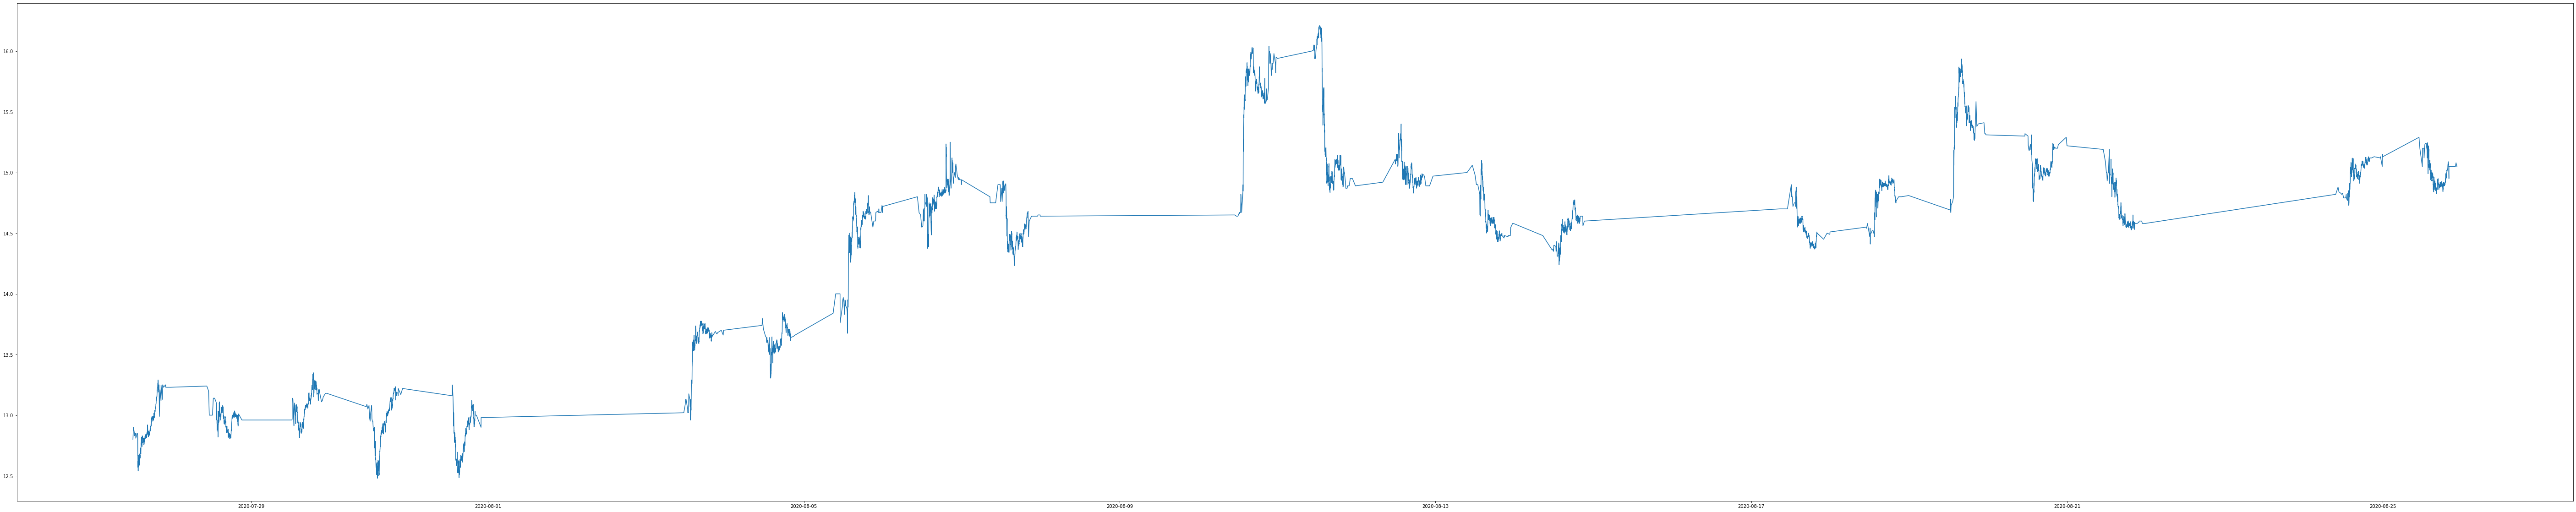

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,20))
plt.plot(df['datetime'], df['open'])

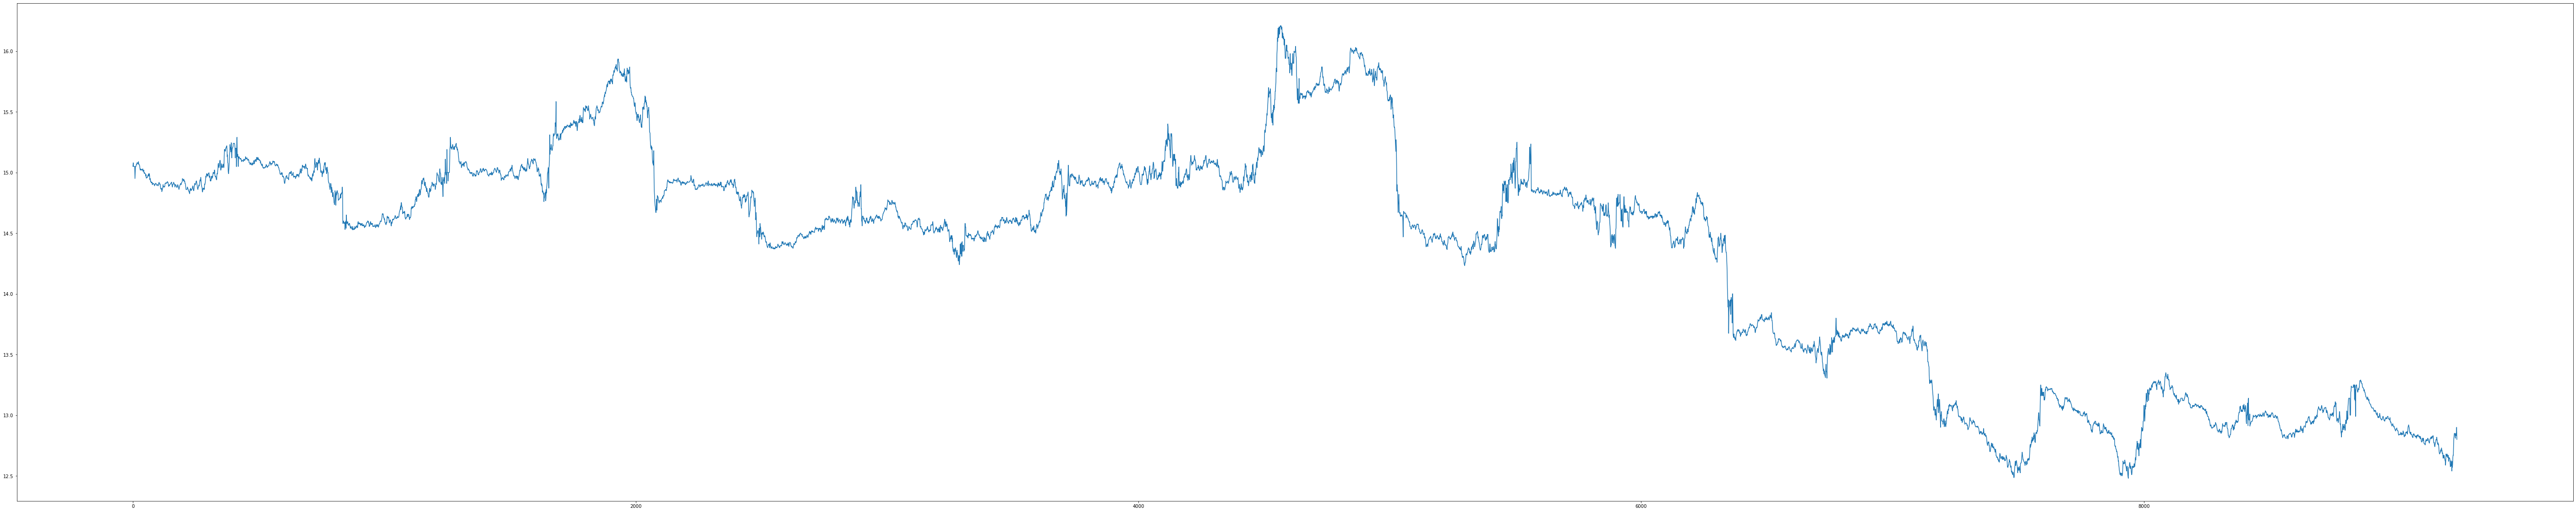

In [13]:
plt.figure(figsize=(100,20))
plt.plot(df.index, df['open'])

In [29]:
df = df[::-1].reset_index(drop=True)

In [31]:
df

,open,high,low,close,volume,datetime,date,hour,minute,min_num,SYMBOL,prev_close,diff_1,pct_change,log_return
0,12.8000,12.80,12.8000,12.80,1000,2020-07-27 12:03:00,2020-07-27,12,3,723,AA,NaN,NaN,NaN,NaN
1,12.8999,12.90,12.8999,12.90,1000,2020-07-27 12:12:00,2020-07-27,12,12,732,AA,12.8000,0.1000,0.007812,0.007782
2,12.8400,12.84,12.8400,12.84,100,2020-07-27 12:34:00,2020-07-27,12,34,754,AA,12.9000,-0.0600,-0.004651,-0.004662
3,12.8300,12.83,12.8300,12.83,571,2020-07-27 12:35:00,2020-07-27,12,35,755,AA,12.8400,-0.0100,-0.000779,-0.000779
4,12.8500,12.85,12.8500,12.85,500,2020-07-27 12:50:00,2020-07-27,12,50,770,AA,12.8300,0.0200,0.001559,0.001558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,15.0500,15.05,15.0500,15.05,655,2020-08-25 20:13:00,2020-08-25,20,13,1213,AA,14.9213,0.1287,0.008625,0.008588
9241,15.0500,15.05,15.0500,15.05,1028,2020-08-25 20:39:00,2020-08-25,20,39,1239,AA,15.0500,0.0000,0.000000,0.000000
9242,15.0500,15.05,15.0500,15.05,179600,2020-08-25 20:40:00,2020-08-25,20,40,1240,AA,15.0500,0.0000,0.000000,0.000000
9243,15.0500,15.05,15.0000,15.00,160,2020-08-25 22:04:00,2020-08-25,22,4,1324,AA,15.0500,-0.0500,-0.003322,-0.003328


In [17]:
240 % 120

0

In [48]:
import time
start_time = time.time()

In [49]:
end_time = time.time()

In [50]:
end_time - start_time

0.827197790145874

In [51]:
60 + start_time - end_time

59.172802209854126

In [52]:
i = 40
if (i *3)% 120 == 0:
        end_time = time.time()
        sleep_time =  60 + start_time - end_time
        print(sleep_time)
        if sleep_time > 0:
            print("Sleeping for {} seconds".format(sleep_time))
            time.sleep(sleep_time)
            print("Awake!")

56.4485809803009
Sleeping for 56.4485809803009 seconds
Awake!
